# Pima Indians Diabetes

## Kaggle
https://www.kaggle.com/uciml/pima-indians-diabetes-database

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load data

In [2]:
filename = 'diabetes.csv'
data = pd.read_csv(filename, skiprows = 0)
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
X = data.iloc[:,:-1]
print(X[1:5])

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33  


In [4]:
y = data['Outcome']
print(y[1:5])

1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64


In [5]:
y.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

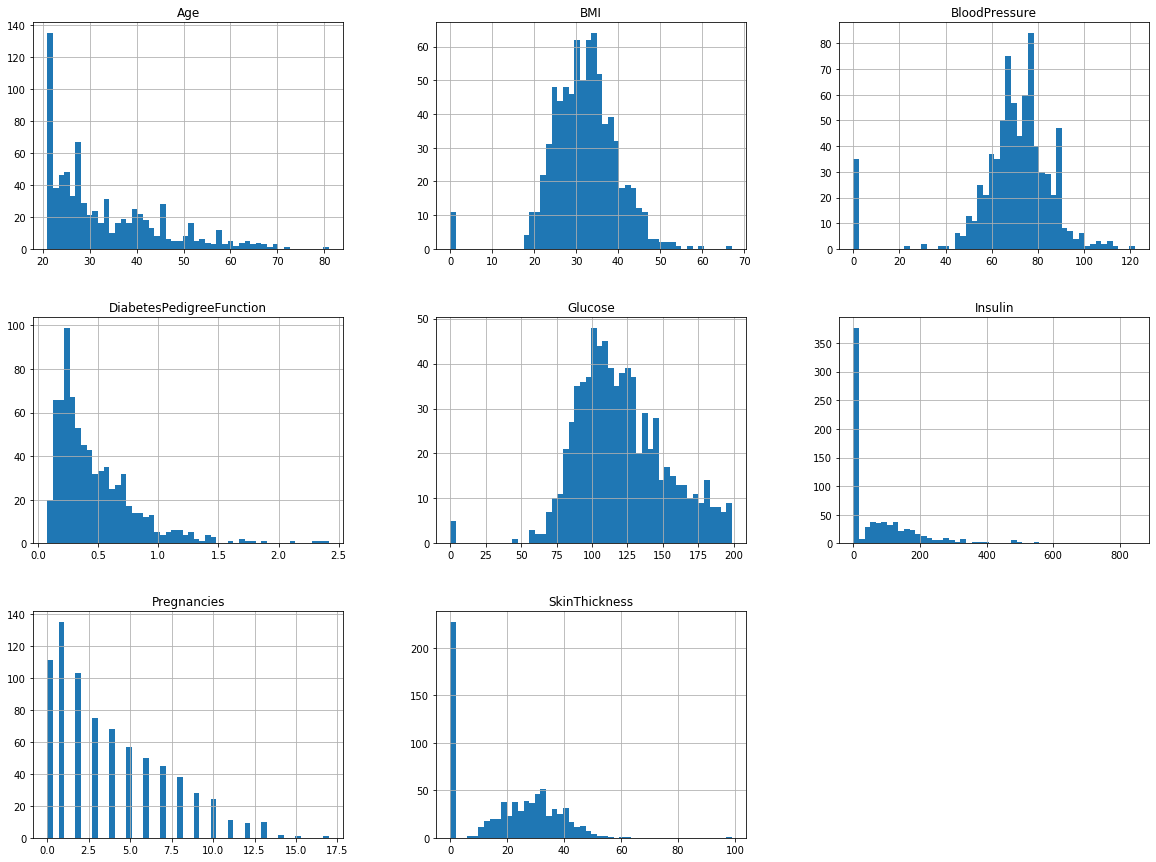

In [6]:
%matplotlib inline
X.hist(bins=50, figsize=(20,15))
plt.show()

In [7]:
print(data.isnull().any())

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool


In [8]:
print(data.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

## Zero values indicate that there are missing values in the dataset

In [9]:
print("Number of rows with 0 values for each variable")
for col in X.columns:
    missing_rows = X.loc[X[col]==0].shape[0]
    print(col + ": " + str(missing_rows))

Number of rows with 0 values for each variable
Pregnancies: 111
Glucose: 5
BloodPressure: 35
SkinThickness: 227
Insulin: 374
BMI: 11
DiabetesPedigreeFunction: 0
Age: 0


## Replace 0 values with NaN

In [10]:
X['Glucose'] = X['Glucose'].replace(0, np.nan)
X['BloodPressure'] = X['BloodPressure'].replace(0, np.nan)
X['SkinThickness'] = X['SkinThickness'].replace(0, np.nan)
X['Insulin'] = X['Insulin'].replace(0, np.nan)
X['BMI'] = X['BMI'].replace(0, np.nan)

In [11]:
print("Number of rows with 0 values for each variable")
for col in X.columns:
    missing_rows = X.loc[X[col]==0].shape[0]
    print(col + ": " + str(missing_rows))

Number of rows with 0 values for each variable
Pregnancies: 111
Glucose: 0
BloodPressure: 0
SkinThickness: 0
Insulin: 0
BMI: 0
DiabetesPedigreeFunction: 0
Age: 0


## Replace NaN values with mean of the non-missing values

In [12]:
X['Glucose'] = X['Glucose'].fillna(X['Glucose'].mean())
X['BloodPressure'] = X['BloodPressure'].fillna(X['BloodPressure'].mean())
X['SkinThickness'] = X['SkinThickness'].fillna(X['SkinThickness'].mean())
X['Insulin'] = X['Insulin'].fillna(X['Insulin'].mean())
X['BMI'] = X['BMI'].fillna(X['BMI'].mean())

## Split data

In [13]:
from sklearn.model_selection import train_test_split
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=42)

In [14]:
y_train.value_counts()

0    279
1    153
Name: Outcome, dtype: int64

In [15]:
len(y_test)

192

## Data Standardization

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
scaler = StandardScaler()

In [18]:
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

## Multilayer Perceptrons (MLP)

In [19]:
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers

In [20]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report

In [21]:
# function to plot the ROC curves
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

## Build neural network in Keras

In [22]:
import tensorflow as tf
#tf.__version__

In [23]:
from tensorflow import keras
#keras.__version__

In [24]:
model = Sequential()
model.add(Dense(32, activation='relu', input_dim=8))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [25]:
history = model.fit(X_train, y_train, epochs=100, validation_data = (X_valid,y_valid), verbose=False)

In [26]:
scores_train = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: %.2f%%\n" % (scores_train[1]*100))
scores_valid = model.evaluate(X_valid, y_valid, verbose=False)
print("Validation Accuracy: %.2f%%\n" % (scores_valid[1]*100))
scores_test = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy: %.2f%%\n" % (scores_test[1]*100))

Training Accuracy: 87.96%

Validation Accuracy: 75.69%

Testing Accuracy: 70.31%



In [27]:
y_test_pred_probs = model.predict(X_test)

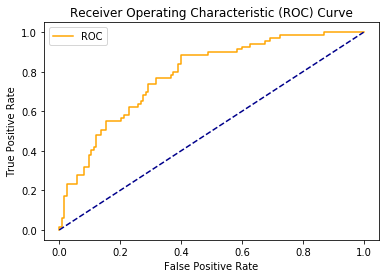

In [28]:
FPR, TPR, thresholds = roc_curve(y_test, y_test_pred_probs)
plot_roc_curve(FPR, TPR)

In [29]:
y_test_pred = (model.predict(X_test) > 0.5).astype("int32")

In [30]:
cm = confusion_matrix(y_test, y_test_pred)

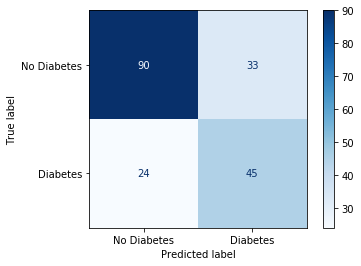

In [31]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Diabetes', 'Diabetes'])
disp.plot(cmap = 'Blues')
plt.show()

In [32]:
recall_score(y_test, y_test_pred, pos_label=1)

0.6521739130434783

In [33]:
accuracy_score(y_test, y_test_pred)

0.703125

In [34]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.79      0.73      0.76       123
           1       0.58      0.65      0.61        69

    accuracy                           0.70       192
   macro avg       0.68      0.69      0.69       192
weighted avg       0.71      0.70      0.71       192



In [35]:
auc_baseline = roc_auc_score(y_test, y_test_pred_probs)
print('AUC: %.2f' % auc_baseline)

AUC: 0.78
